### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



##1.1 Ingresos totales por tienda

In [ ]:
ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda["Precio"].sum(),
        tienda2["Precio"].sum(),
        tienda3["Precio"].sum(),
        tienda4["Precio"].sum()
    ]
}

df_ingresos = pd.DataFrame(ingresos)

df_ingresos["Ingreso Formateado"] = df_ingresos["Ingreso Total"].apply(lambda x: f"${x:,.0f}")

df_ingresos

,Tienda,Ingreso Total,Ingreso Formateado
0,Tienda 1,1.150880e+09,"$1,150,880,400"
1,Tienda 2,1.116344e+09,"$1,116,343,500"
2,Tienda 3,1.098020e+09,"$1,098,019,600"
3,Tienda 4,1.038376e+09,"$1,038,375,700"


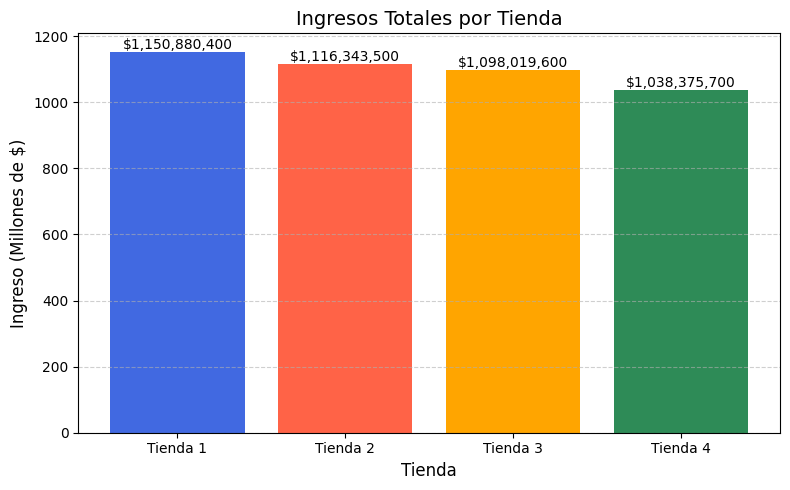

In [ ]:
import matplotlib.pyplot as plt

colores = ["royalblue", "tomato", "orange", "seagreen"]

# Escalar a millones
df_ingresos["Ingreso en Millones"] = df_ingresos["Ingreso Total"] / 1_000_000


plt.figure(figsize=(8, 5))
bars = plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso en Millones"], color=colores)


for bar, label in zip(bars, df_ingresos["Ingreso Formateado"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label,
             ha='center', va='bottom', fontsize=10)


plt.title("Ingresos Totales por Tienda", fontsize=14)
plt.ylabel("Ingreso (Millones de $)", fontsize=12)
plt.xlabel("Tienda", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
df_prodxcat_t1 = tienda.groupby('Categoría del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t2 = tienda2.groupby('Categoría del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t3 = tienda3.groupby('Categoría del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)
df_prodxcat_t4 = tienda4.groupby('Categoría del Producto')[["Producto"]].count().sort_values(by="Producto", ascending=False)

print(df_prodxcat_t1)
print(df_prodxcat_t2)
print(df_prodxcat_t3)
print(df_prodxcat_t4)

                         Producto
Categoría del Producto           
Muebles                       465
Electrónicos                  448
Juguetes                      324
Electrodomésticos             312
Deportes y diversión          284
Instrumentos musicales        182
Libros                        173
Artículos para el hogar       171
                         Producto
Categoría del Producto           
Muebles                       442
Electrónicos                  422
Juguetes                      313
Electrodomésticos             305
Deportes y diversión          275
Instrumentos musicales        224
Libros                        197
Artículos para el hogar       181
                         Producto
Categoría del Producto           
Muebles                       499
Electrónicos                  451
Juguetes                      315
Electrodomésticos             278
Deportes y diversión          277
Libros                        185
Artículos para el hogar       177
Instrumentos m

# 3. Calificación promedio de la tienda


In [ ]:
promedios = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio": [
        tienda['Calificación'].mean(),
        tienda2['Calificación'].mean(),
        tienda3['Calificación'].mean(),
        tienda4['Calificación'].mean()
    ]
}

df_promedios = pd.DataFrame(promedios)

df_promedios

,Tienda,Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


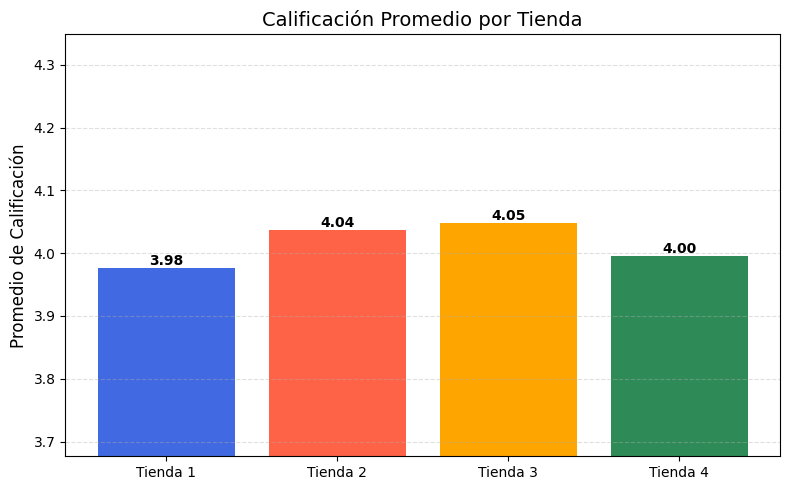

In [ ]:

plt.figure(figsize=(8, 5))
bars = plt.bar(df_promedios["Tienda"], df_promedios["Promedio"], color=colores)


for bar, promedio in zip(bars, df_promedios["Promedio"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{promedio:.2f}",
             ha='center', va='bottom', fontsize=10, weight='bold')


plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.ylabel("Promedio de Calificación", fontsize=12)

# Amplificar escalas
minimo = df_promedios["Promedio"].min()
maximo = df_promedios["Promedio"].max()
margen = 0.3
plt.ylim(minimo - margen, maximo + margen)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

##4.1 Prodctos mas vendidos por tienda

In [ ]:

df_prodcant1 = tienda["Producto"].value_counts().sort_values(ascending=False)
df_prodcant2 = tienda2["Producto"].value_counts().sort_values(ascending=False)
df_prodcant3 = tienda3["Producto"].value_counts().sort_values(ascending=False)
df_prodcant4 = tienda4["Producto"].value_counts().sort_values(ascending=False)

producto_mas_vendido = df_prodcant1.idxmax()
cantidad_mas_vendida = df_prodcant1.max()

producto_mas_vendido2 = df_prodcant2.idxmax()
cantidad_mas_vendida2 = df_prodcant2.max()

producto_mas_vendido3 = df_prodcant3.idxmax()
cantidad_mas_vendida3 = df_prodcant3.max()

producto_mas_vendido4 = df_prodcant4.idxmax()
cantidad_mas_vendida4 = df_prodcant4.max()

print(f"Producto más vendido de la tienda 1: {producto_mas_vendido} ({cantidad_mas_vendida} ventas)")
print(f"Producto más vendido de la tienda 2: {producto_mas_vendido2} ({cantidad_mas_vendida2} ventas)")
print(f"Producto más vendido de la tienda 3: {producto_mas_vendido3} ({cantidad_mas_vendida3} ventas)")
print(f"Producto más vendido de la tienda 4: {producto_mas_vendido4} ({cantidad_mas_vendida4} ventas)")



Producto más vendido de la tienda 1: Microondas (60 ventas)
Producto más vendido de la tienda 2: Iniciando en programación (65 ventas)
Producto más vendido de la tienda 3: Kit de bancas (57 ventas)
Producto más vendido de la tienda 4: Cama box (62 ventas)


##4.2 Productos menos vendidos por tienda

In [ ]:
producto_maenos_vendido = df_prodcant1.idxmin()
cantidad_maenos_vendida = df_prodcant1.min()

producto_maenos_vendido2 = df_prodcant2.idxmin()
cantidad_maenos_vendida2 = df_prodcant2.min()

producto_maenos_vendido3 = df_prodcant3.idxmin()
cantidad_maenos_vendida3 = df_prodcant3.min()

producto_maenos_vendido4 = df_prodcant4.idxmin()
cantidad_maenos_vendida4 = df_prodcant4.min()

print(f"Producto menos vendido de la tienda 1: {producto_maenos_vendido} ({cantidad_maenos_vendida} ventas)")
print(f"Producto menos vendido de la tienda 2: {producto_maenos_vendido2} ({cantidad_maenos_vendida2} ventas)")
print(f"Producto menos vendido de la tienda 3: {producto_maenos_vendido3} ({cantidad_maenos_vendida3} ventas)")
print(f"Producto menos vendido de la tienda 4: {producto_maenos_vendido4} ({cantidad_maenos_vendida4} ventas)")

Producto menos vendido de la tienda 1: Auriculares con micrófono (33 ventas)
Producto menos vendido de la tienda 2: Juego de mesa (32 ventas)
Producto menos vendido de la tienda 3: Bloques de construcción (35 ventas)
Producto menos vendido de la tienda 4: Guitarra eléctrica (33 ventas)


# 5. Costo de envío promedio por tienda

In [ ]:
promedios_costos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo Promedio": [
        tienda['Costo de envío'].mean(),
        tienda2['Costo de envío'].mean(),
        tienda3['Costo de envío'].mean(),
        tienda4['Costo de envío'].mean()
    ]
}

df_costo = pd.DataFrame(promedios_costos)

df_pcosto = df_costo.sort_values(by="Costo Promedio", ascending=False)

df_pcosto

,Tienda,Costo Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


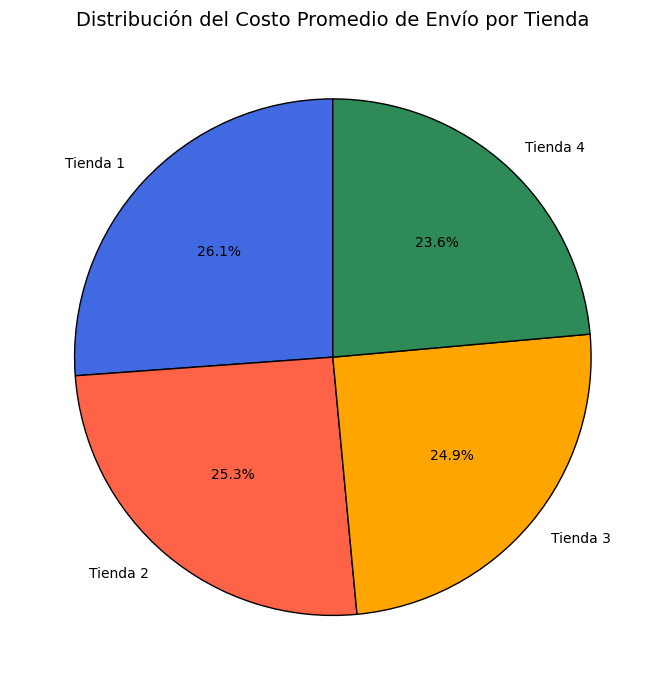

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_pcosto["Costo Promedio"],
        labels=df_pcosto["Tienda"],
        autopct="%1.1f%%",
        startangle=90,
        colors=colores,
        wedgeprops={'edgecolor': 'black'})

plt.title("Distribución del Costo Promedio de Envío por Tienda", fontsize=14)
plt.tight_layout()
plt.show()


# 6. Informe del analisis

*Recomendación para adminitrar las tiendas para el Sr. Juan*

---

## 📌 Introducción

El propósito de este análisis es identificar cuál de las cuatro tiendas disponibles representa la mejor oportunidad de ventas para el Sr. Juan. Para ello, se han analizado y visualizado varios aspectos fundamentales del rendimiento de cada tienda, incluyendo:

- Ingresos totales.
- Categorías de productos más y menos vendidas.
- Productos individuales con mejor y peor desempeño.
- Calificación promedio otorgada por los clientes.
- Costo promedio de envío.

Con base en estos factores, se presentará una recomendación clara y justificada.

---

## 📈 Desarrollo del análisis

### 🪙 Ingresos totales por tienda

Los ingresos fueron calculados como la suma total de los precios de los productos vendidos. A continuación, el resumen:


| Tienda   | Ingreso Total    |
|----------|------------------------|
| Tienda 1 | \$1,150,880,400        |
| Tienda 2 | \$1,116,343,500        |
| Tienda 3 | \$1,098,019,600        |
| Tienda 4 | \$1,038,375,700        |


**Tienda 1** lidera en ingresos, lo cual indica un volumen y valor de ventas superior.

### 📦 Categorías más y menos vendidas

Cada tienda mostró un patrón distinto de consumo. Sin embargo, **Electrónicos** y **Muebles** destacan como categorías más vendidas. Por el contrario, categorías como **Libros** figura como la segunda categoria menos demandada en todas las tiendas, en las tiendas 1 y 2 comparten la categoria **Articulos para el hogar** como la menos demandada, y en el caso de las tiendas 3 y 4 ese lugar le corresponde a **Instrumentos musicales**.

Esto puede indicar una preferencia del público por productos tecnológicos y de entretenimiento familiar.

### 🧍‍♂️ Productos más y menos vendidos

Al revisar productos específicos, se observó que:

El congruencia con lo visto en el analisis de las categorias, los **Microondas** y **Kit de bancas** figuran en los productos mas vendidos, y **Auriculares con microfono** y **Guitarra electrica** como los menos vendidos.

### ⭐ Calificaciones promedio

| Tienda   | Calificación Promedio |
|----------|:------------------------:|
| Tienda 1 | 3.97                    |
| Tienda 2 | 4.03                    |
| Tienda 3 | 4.04                    |
| Tienda 4 | 3.99                   |

**Tienda 3** sobresale, lo que sugiere **mayor satisfacción del cliente**, posiblemente debido a buen servicio postventa, producto o entrega. Sin embargo la desviacion es de menos de un 1 puinto por lo tanto no es significativo.

### 🚚 Costo promedio de envío

| Tienda   | Costo Promedio de Envío  |
|----------|:------------------------------:|
| Tienda 1 | \$26,018.61                   |
| Tienda 2 | \$25,216.24                   |
| Tienda 3 | \$24,805.68                   |
| Tienda 4 | \$23,459.46                   |

La **Tienda 1** tiene el mayor costo de envío promedio, esto puede deberse a que es una tienda que esta localizada a mas distancia de su demanda que las demas, esto se va en la misma linea que los resultados de la calificaciones, recibiendo la menos calificacion tal vez por las demoras en los envios.
---

## ✅ Conclusión y recomendación

Luego de analizar todos los factores relevantes, **la recomendación final es que el Sr. Juan debería vender sus productos en la *Tienda 3*.**

**Justificación:**

- Si bien no es quien destaca en todas las estadisticas individualmente, es la tienda con el potecical más balanceado y representa mejor los numeros de los mejores resultado segun los porductos vendidos, **Muebles** y **Electronicos**.
- Posee la **calificación promedio más alta**, señal de clientes satisfechos.
- Sus costos son el **2do más bajo** persiviendo sus productos como relativamente mas **baratos** que los de las otras tiendas.


#7. Bonus: Análisis del desempeño geográfico


##7.1 Mapa de Calor por densidad de ventas según localizacion

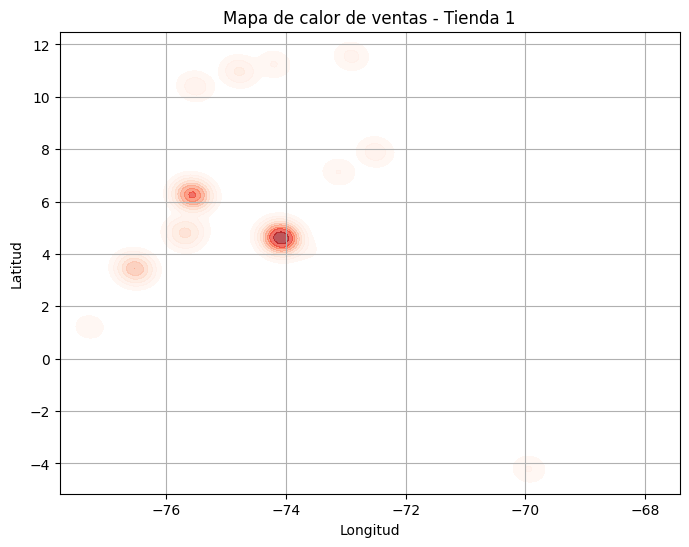

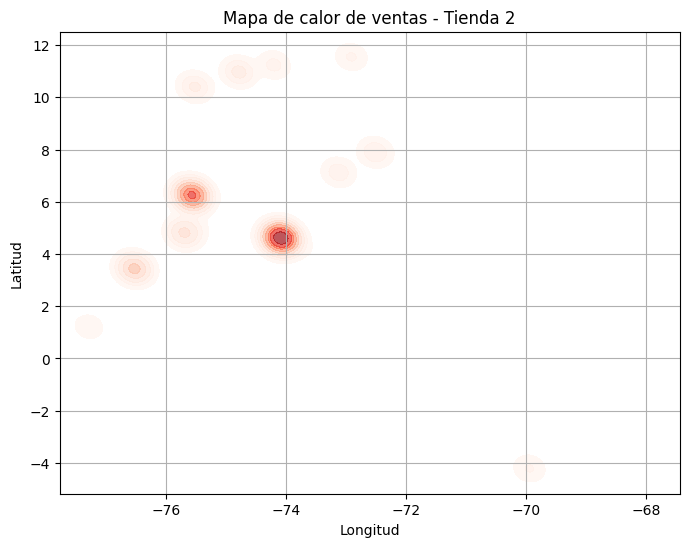

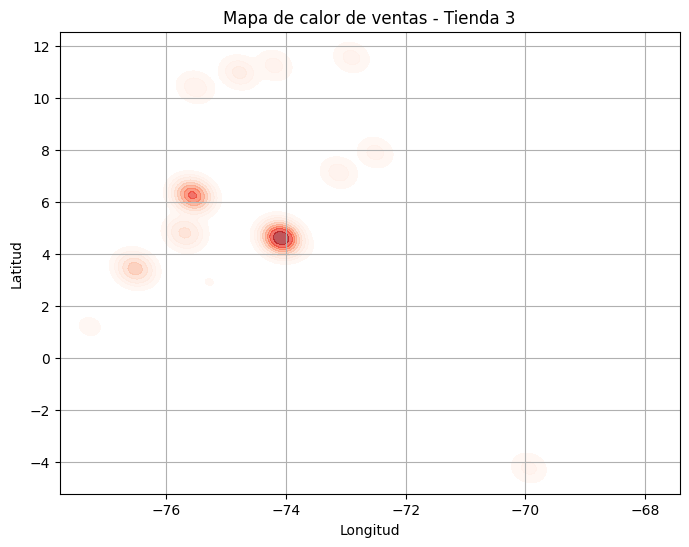

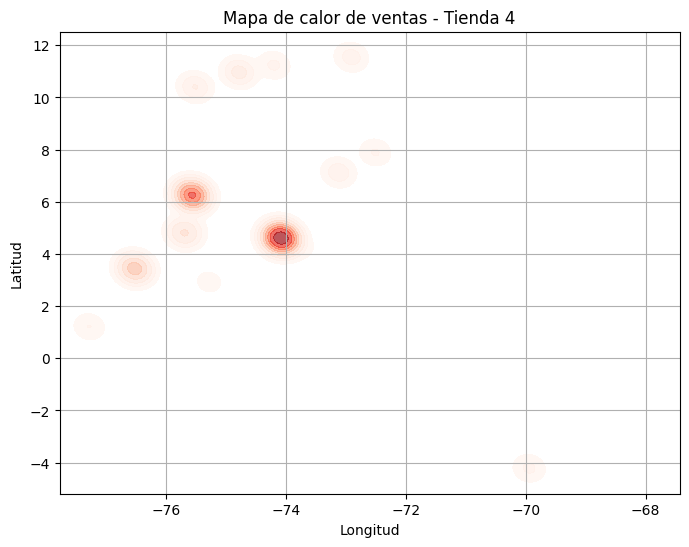

In [3]:
import seaborn as sns

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(
        x=df["lon"], y=df["lat"],
        cmap="Reds", fill=True, bw_adjust=0.5, alpha=0.7, thresh=0.05
    )
    plt.title(f"Mapa de calor de ventas - Tienda {i}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()


In [4]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en el promedio de todas las coordenadas
lat_centro = pd.concat([tienda["lat"], tienda2["lat"], tienda3["lat"], tienda4["lat"]]).mean()
lon_centro = pd.concat([tienda["lon"], tienda2["lon"], tienda3["lon"], tienda4["lon"]]).mean()

mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=5)

# Función para agregar capa de calor de una tienda
def agregar_heatmap(df, mapa, nombre):
    heat_data = df[["lat", "lon"]].values.tolist()
    HeatMap(heat_data, name=nombre, radius=10).add_to(mapa)

# Agregar las cuatro tiendas
agregar_heatmap(tienda, mapa, "Tienda 1")
agregar_heatmap(tienda2, mapa, "Tienda 2")
agregar_heatmap(tienda3, mapa, "Tienda 3")
agregar_heatmap(tienda4, mapa, "Tienda 4")

# Agregar control de capas
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa


##7.2 Analisis estadistico

Al observar los mapas de calor, sospeche que las densidades de la ventas por localizacion gegografica son muy parecidas, lo que implicaria que sus demandas son practicamente iguales. Para comprobralo examine los rangos y las medias, y se puede conluir que en efecto son casi identicas.

In [ ]:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}")
    print("Latitud:", df["lat"].min(), "-", df["lat"].max(), " | Media:", df["lat"].mean())
    print("Longitud:", df["lon"].min(), "-", df["lon"].max(), " | Media:", df["lon"].mean())
    print("-" * 50)


Tienda 1
Latitud: -4.21528 - 11.54444  | Media: 5.365282831708351
Longitud: -77.28111 - -67.9239  | Media: -74.7894174014413
--------------------------------------------------
Tienda 2
Latitud: -4.21528 - 11.54444  | Media: 5.499753454853751
Longitud: -77.28111 - -67.9239  | Media: -74.74296271301398
--------------------------------------------------
Tienda 3
Latitud: -4.21528 - 11.54444  | Media: 5.437076324713862
Longitud: -77.28111 - -67.9239  | Media: -74.73346308605342
--------------------------------------------------
Tienda 4
Latitud: -4.21528 - 11.54444  | Media: 5.413518859202714
Longitud: -77.28111 - -67.9239  | Media: -74.77459652671756
--------------------------------------------------
